INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


[[9.0457726e-01 2.2353380e-08 6.8620980e-18 9.5422745e-02]]
bicep 0.90457726


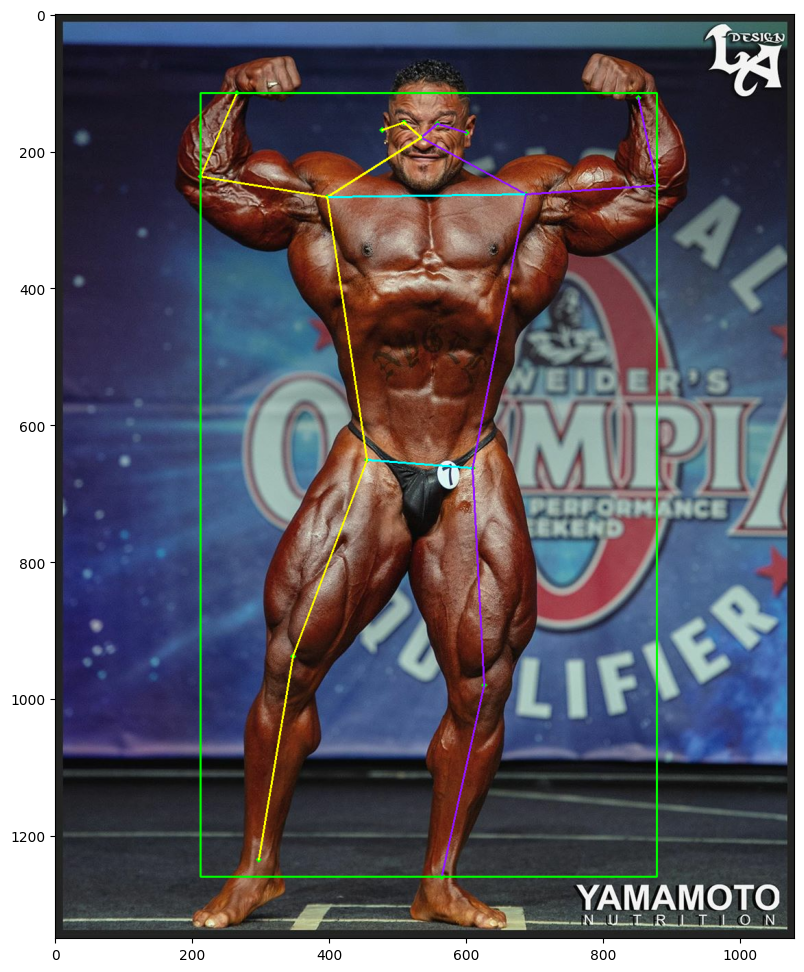

In [1]:
from PIL import Image
import tensorflow as tf
import numpy as np
import cv2
from pose import detect, draw_prediction_on_image
with open('pose_labels.txt', 'r') as  f:
    labels = f.readlines() 

detection_threshold = 0.1
image_path = './tmp/vjmi7zdpxmo31.jpg'
image = tf.io.read_file(image_path)

fileformat = image_path.split('.')[-1]

if fileformat == 'png':
    image = tf.io.decode_png(image)
else:
    image = tf.io.decode_jpeg(image)

def predictImage(image) -> (str, float):

    person = detect(image)

    # Save landmarks if all landmarks were detected
    min_landmark_score = min(
        [keypoint.score for keypoint in person.keypoints])
    should_keep_image = min_landmark_score >= detection_threshold


    if not should_keep_image:
        pass

    # Get landmarks and scale it to the same size as the input image
    pose_landmarks = np.array(
        [[keypoint.coordinate.x, keypoint.coordinate.y, keypoint.score]
        for keypoint in person.keypoints],
        dtype=np.float32)

    # Write the landmark coordinates to its per-class CSV file


    coordinates = pose_landmarks.flatten().astype(np.float32).tolist()
    coordinates = np.array(coordinates, dtype=np.float32).reshape((1, -1))

    interpreter = tf.lite.Interpreter(model_path="pose_classifier.tflite")
    interpreter.allocate_tensors()

    input_index = interpreter.get_input_details()[0]["index"]
    output_index = interpreter.get_output_details()[0]["index"]

    interpreter.set_tensor(input_index, coordinates)

    interpreter.invoke()
    output = interpreter.tensor(output_index)

    print(output())

    labelIdx = np.argmax(output()[0])
    confidence = output()[0][labelIdx]

    classification = labels[labelIdx].strip()

    print(classification, confidence)
    draw_prediction_on_image(np.array(image), person, close_figure=False, keep_input_size=True)


    return classification, confidence




predictImage(image)

In [13]:
import pygame
import time
from mutagen.mp3 import MP3

mp3_file_path = "output.mp3"


def playAudio(file_path):
    audio = MP3(file_path)
    print(audio.info.length)    
    pygame.init()
    sound = pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()
    time.sleep(audio.info.length)
    pygame.mixer.music.stop()
    pygame.quit()

3.408
